<a href="https://colab.research.google.com/github/sophia-li-create/exercise/blob/main/fastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade fastai

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.2.5)


fast AI book:
https://github.com/fastai/fastbook/blob/master/07_sizing_and_tta.ipynb


In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.CIFAR)

In [ ]:
datablock = DataBlock((ImageBlock,CategoryBlock),get_items = get_image_files,splitter = GrandparentSplitter(valid_name = 'test'),get_y = parent_label,item_tfms = Resize(460),batch_tfms = [*aug_transforms(size = 224,min_scale = 0.75),Normalize.from_stats(*imagenet_stats)])

In [ ]:
dls = datablock.dataloaders(path,bs = 64)

In [ ]:
x,y = dls.one_batch()

In [ ]:
x.std((0,1)).std()

TensorImage(0.1017, device='cuda:0')

In [ ]:
learn = cnn_learner(dls,resnet34,metrics =[error_rate,accuracy])
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.611527,0.355933,0.125700,0.874300,05:00


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.230508,0.157237,0.055800,0.944200,06:01


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.12010818865383e-07)

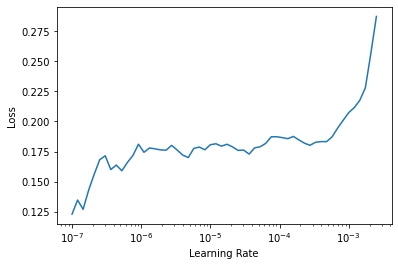

In [ ]:
learn.lr_find()

In [ ]:
learn.save("stage-1")

Path('models/stage-1.pth')

In [ ]:
learn.fit_one_cycle??

In [ ]:
learn.fit_one_cycle(2,1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.154577,0.136095,0.047900,0.952100,06:02
1,0.138270,0.128841,0.045200,0.954800,06:02


In [ ]:
learn.save("stage-2")

Path('models/stage-2.pth')

SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=6.309573450380412e-07)

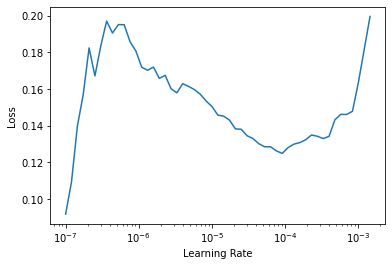

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2,slice(1e-5,2e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.139970,0.123515,0.044300,0.955700,06:03
1,0.112399,0.119566,0.042400,0.957600,06:02


In [ ]:
learn.save("stage-3")

Path('models/stage-3.pth')

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=7.585775847473997e-07)

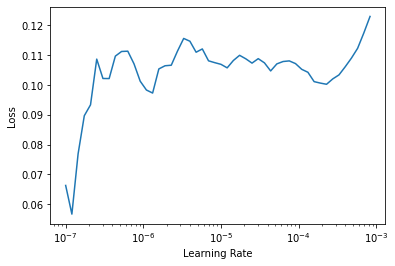

In [ ]:
learn.lr_find()

In [ ]:
datablock2 = DataBlock((ImageBlock,CategoryBlock),get_items = get_image_files,splitter = GrandparentSplitter(valid_name = 'test'),get_y = parent_label,item_tfms = Resize(224),batch_tfms = [*aug_transforms(size = 224,min_scale = 0.75),Normalize.from_stats(*imagenet_stats)])

In [ ]:
dl2 = datablock2.dataloaders(path)

In [ ]:
learn.dls = dl2

In [ ]:
learn.fine_tune(2,1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.107271,0.116425,0.039600,0.960400,04:05


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.108456,0.116098,0.040100,0.959900,05:15
1,0.090449,0.116782,0.039900,0.960100,05:14


In [ ]:
preds,targs = learn.tta()
accuracy(preds,targs).item()

0.9627000093460083

Build a datablock

https://docs.fast.ai/tutorial.datablock.html

In [ ]:
from fastai.data.all import *
from fastai.vision.all import *

path = untar_data(URLs.PETS)

Create a datablock

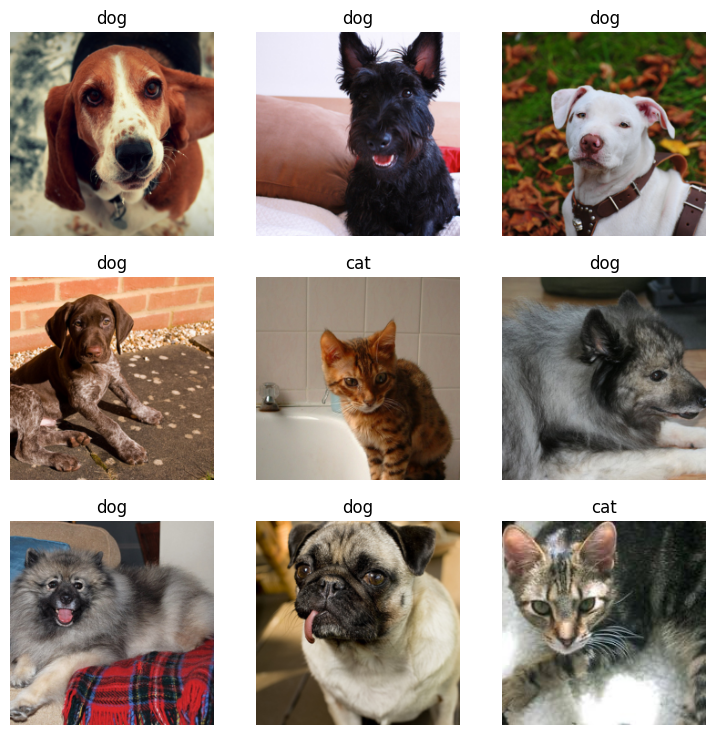

In [ ]:
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224))


dls = dblock.dataloaders(path/"images")
dls.show_batch()
#dsets = dblock.datasets(path/"images")
#dsets.train[0]
#dsets.vocab




In [ ]:
dblock.summary(untar_data(URLs.PETS))

Setting-up type transforms pipelines
Found 14780 items
2 datasets of sizes 11824,2956
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Birman_125.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=334x500
  Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Birman_125.jpg
    applying label_func gives
      cat
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=334x500, TensorCategory(0))


Found 14780 items
2 datasets of sizes 11824,2956
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_ite

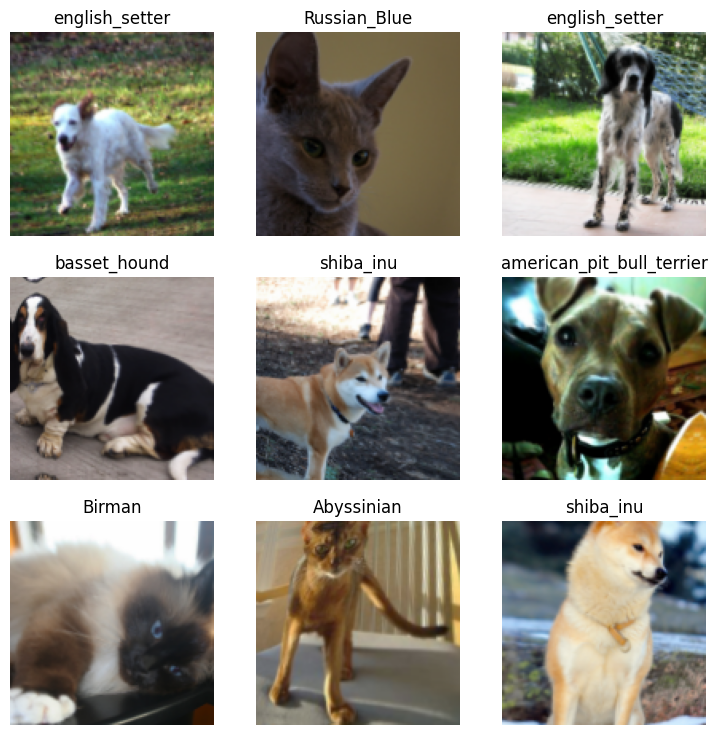

In [ ]:
from fastai.vision.all import *

pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=Pipeline([attrgetter("name"), RegexLabeller(pat = r'^(.*)_\d+.jpg$')]),
                 item_tfms=Resize(128),
                 batch_tfms=aug_transforms())

dls2 = pets.dataloaders(untar_data(URLs.PETS)/"images")
dls2.show_batch(max_n=9)

In [ ]:
from fastai.vision.all import *

mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items=get_image_files,
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)



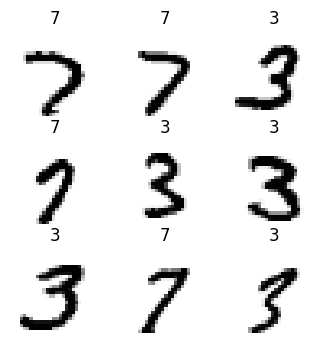

In [ ]:
dls = mnist.dataloaders(untar_data(URLs.MNIST_TINY))
dls.show_batch(max_n=9, figsize=(4,4))

In [ ]:
mnist.summary(untar_data(URLs.MNIST_TINY))

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_tiny/train/3/8228.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/mnist_tiny/train/3/8228.png
    applying parent_label gives
      3
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(0))


Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: ToTensor
Sett

In [ ]:
pascal_source = untar_data(URLs.PASCAL_2007)
df = pd.read_csv(pascal_source/"train.csv")

df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


/usr/local/lib/python3.11/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


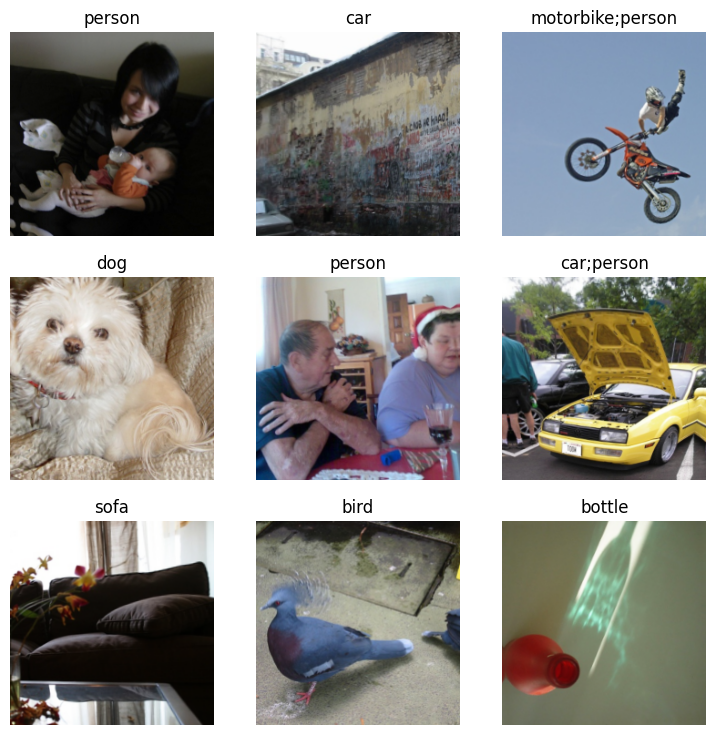

In [ ]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter(),
                   get_x=ColReader(0, pref=pascal_source/"train"),
                   get_y=ColReader(1, label_delim=' '),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

dls = pascal.dataloaders(df)
dls.show_batch()

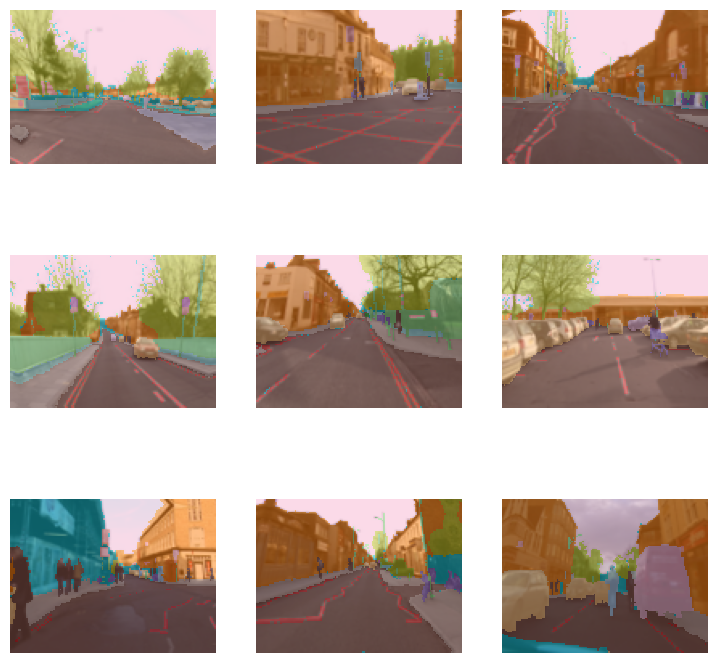

In [ ]:
path = untar_data(URLs.CAMVID_TINY)

camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes = np.loadtxt(path/'codes.txt', dtype=str))),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    batch_tfms=aug_transforms())

dls = camvid.dataloaders(path/"images")
dls.show_batch()